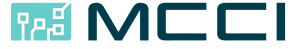


# $g_m/I_D$ Design With Python

<h2>Homework 1<a class="tocSkip"></h2>

You have been tasked with designing a front-end preamplifier for the sensor interface of an ultra low-power wireless sensor node. An example of such a sensor is a piezoelectric device which could be used to measure industrial motor vibrations for fault detection. The specifications you have been given for this task are as follows:

$$
\begin{aligned}
& \text {Table 1.1. Front-end Preamplifier Specification }\\
&\begin{array}{cc}
\hline \hline \text { Parameter } & \text { Specification } \\
\hline A_v & > 50  \\
f_u & 50 MHz  \\
v_{out} & > 600mV p-to-p  \\
V_{OUT,Q} & 0.6V  \\
V_{DD} & 1.2 V  \\
C_L & 2 pF \\
\overline{v}_n^{in} & \leq 250 nV/\sqrt{Hz}\\
I_{bias} & 4 \mu A\\
\hline
\end{array}
\end{aligned}
$$

$I_{M,1}=M\times I_{bias}$

_For simplicity_, the architecture you must use is the PMOS Common Source Amplifier with active load, shown below.

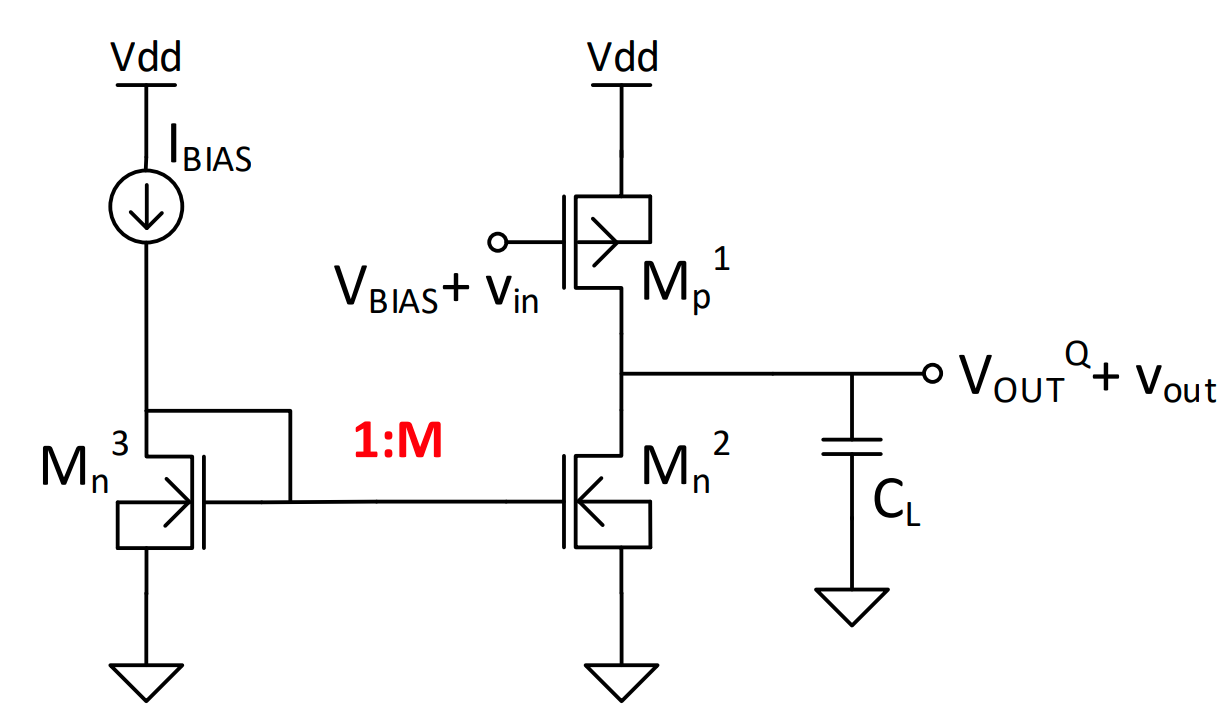

<h2>Question 1<a class="tocSkip"></h2>

**a)** Derive an expression for the small signal gain of the gain stage.

**b)** As a rule of thumb, we usually set $f_T\geq 10\times f_u$. Derive an expression relating $f_T$, $g_m/I_D$ and Area ($W\times L$)

**c)** From the CS circuit small signal model, derive an expression for the unity gain frequency $f_u$ considering $g_m/I_D$ and $V_{DSAT}$. What is the relationship between $V_{DSAT}$ and amplifier headroom? Give an initial estimate of the maximum $V_{DSAT}$ that can be used for the load device $M_2$.
    
**d)** What is your initial estimate for the $g_m/I_D$ ratio of each transistor? State why. (**Hint**: low power operation of the gain stage is the design goal, balance with $V_{DSAT,MAX}$)

**a)**

**b)** $$
\begin{align*}
        \omega_T &= \frac{g_m}{C_{gg}},\qquad f_T = \frac{g_m}{2\pi C_{gg}}\\
        C_{gg} &= C_{gs} + C_{gd} \approx W L C_{ox}\\
        f_T &= ...
    \end{align*}$$


**c)** 


**d)** 

<h2>Question 2<a class="tocSkip"></h2>

The design is to be carried out on the **gpdk090**, 90 nm process. In the following questions, assume the
following: $V_{DD}$ = 1.2 V, $L=0.2 \mu m$, $\gamma=0.85$ for all transistors. For this question use python and
the lookup functions to calculate your answers. 

_Note that the $g_m/I_D$ script assumes L and W in
$\mu$ m, all other quantities in the usual units_.

Remember $I_{bias}=4 \mu A$ and $V_{out}^Q=\frac{V_{DD}}{2}=600 mV$.

**a)** Sweep the device length of $M_1$ to see if the minimum gain spec of 50 can be achieved. (**Hint** as a simplification use the equation from 1(a) and set $g_{ds,2} = 0.125 \times g_{ds,1})$. Using the `look_up('GM_GDS')` produce a plot of gain versus $L_1$ to show the minimum length required to achieve the gain. Plot the gain for the estimated $g_m/I_D$ from 1(a) and repeat the plot for four other $g_m/I_D$ ratios.

In [2]:
from pygmid import Lookup as lk
import matplotlib.pyplot as plt
import numpy as np

# load transistor data into two lookup objects
# NMOS data stored in NCH
NCH = lk('sky130nfet.mat')

# PMOS data stored in PCH
PCH = lk('sky130pfet.mat')

# ................................
# Your code here .................
# ................................


#Sweep the device length of 𝑀1 to see if the minimum gain spec of 50 can be achieved. 
#(Hint as a simplification use the equation from 1(a) and set 𝑔𝑑𝑠,2=0.125×𝑔𝑑𝑠,1). 
#Using the look_up('GM_GDS') produce a plot of gain versus 𝐿1 to show the minimum length required to 
#achieve the gain. 
#Plot the gain for the estimated 𝑔𝑚/𝐼𝐷 from 1(a) and repeat the plot for four other 𝑔𝑚/𝐼𝐷 ratios.


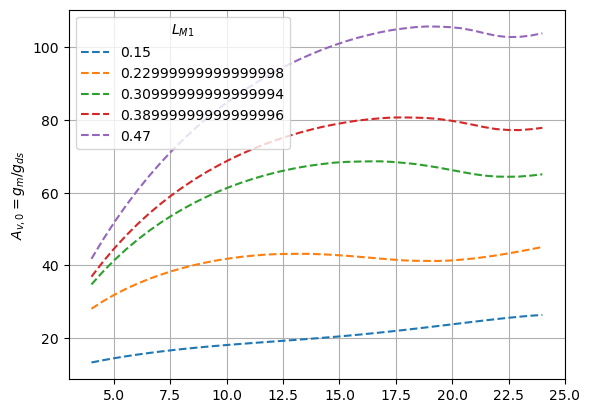

In [19]:
#             start stop step
Ls = np.arange(0.15, 0.5, 0.08)
GM_IDs = np.linspace(4, 24, num=40)

#calculate AV's
Av = NCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()


labels = [str(i) for i in Ls]
ax1.plot(GM_IDs, Av.T,linestyle='dashed')
ax1.set_ylabel(r"$A_{v,0}=g_m/g_{ds}$")
ax1.grid()
ax1.legend(labels,title=r"$L_{M1}$")
plt.show()

In [9]:
GM_IDs

array([ 4.        ,  4.51282051,  5.02564103,  5.53846154,  6.05128205,
        6.56410256,  7.07692308,  7.58974359,  8.1025641 ,  8.61538462,
        9.12820513,  9.64102564, 10.15384615, 10.66666667, 11.17948718,
       11.69230769, 12.20512821, 12.71794872, 13.23076923, 13.74358974,
       14.25641026, 14.76923077, 15.28205128, 15.79487179, 16.30769231,
       16.82051282, 17.33333333, 17.84615385, 18.35897436, 18.87179487,
       19.38461538, 19.8974359 , 20.41025641, 20.92307692, 21.43589744,
       21.94871795, 22.46153846, 22.97435897, 23.48717949, 24.        ])

**b)** Setting the constraint $f_T \geq 10 \times f_u$ use the `lookup('GM_CGG')` function to check that the $L_1$ and $g_m/I_D$ values from 2(a) satisfy this constraint. 


In [2]:
# HINT: GM_CGG = PCH.look_up('GM_CGG', GM_ID=GM_ID, L=L)

# ................................
# Your code here .................
# ................................

**c)** Take the expression for $f_u$ from 1(c) and initially ignoring the parasitic capacitors $C_{dd}^1$ and $C_{dd}^2$ using the $L_1$ and $g_m/I_D$ values that satisfy 2(b) find the minimum $M\times I_{bias}$ where $M$ is an integer that can achieve $f_u=50 MHz$. (Hint: solve the equation for M ). Calculate the value of $g_{m,1}$.

In [3]:
# to round to the nearest integer, use np.ceil()

# ................................
# Your code here .................
# ................................

**d)** Using the $g_m/I_D$ values for $M_2$ from 1(d) and the current from 2(c), find the values of $L_2$ and $W_2$ that achieve the requirement from 2(a) that $g_{ds2}=0.125\times g_{ds1}$. (**Hint:** use the `lookup("ID_W")` function to find $W_2$ and the `lookup("GM_GDS")` function with the $g_m/I_D$ to find $L_2$)

In [4]:
# ................................
# Your code here .................
# ................................

# check gds of PMOS
# HINT: gmP * 1/PCH.look_up('GM_GDS', GM_ID=GM_ID, L=L)

# sweep NMOS device L to achieve GDS = 8 * GDS,P
# HINT: L_array = np.linspace(1, 4, num=50)
# HINT NCH.look_up('GDS_ID', ..., ...)

In [8]:
# ................................
# Your code here .................
# ................................

# size the transistors with ID_W

<h2>Question 3<a class="tocSkip"></h2>

**a)** From the value of $\gamma$ given above, and the $g_m$ values in 3(a), calculate the thermal spot noise current of each of the transistors. Refer this to the gate of the input transistor $M1$ to obtain $\overline{v}_{n}^{in}$. Does this meet the specification? 

**a)** 

**b)** Use the `look_upVGS()` function to find $V_{GS,1}$ and $V_{GS,2}$

In [6]:
# ................................
# Your code here .................
# ................................

# HINT: look_upVGS requires: 1) GM_ID (or ID/W), 2) L, 3) VDS and 4) VSB
# if L, VDS and VSB are not provided, they default to 0.1, 0.6 and 0 respectively


**c)** Using the equation from 1 (c) and the lookup function to calculate the $C_{db}$ of $M_n^{M2}$ and $M_p^{M2}$. **Hint:** `Cdd_M1 = PCH.look_up('CDD', VGS=Vgs_M1)`. Along with the $g_{m,1}$ values obtained in Q2 (c), check that the requirement $f_u=50$ MHz is still satisfied.

In [ ]:
# ................................
# Your code here .................
# ................................

**d)** If you are designing a current mirror active load, would you use devices biased in weak inversion or strong inversion? Explain.